<a href="https://colab.research.google.com/github/igquinteroch/deep-learning-coursework/blob/main/A2b_DL_TC5033_A01794419.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

### Objective

The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

### Instructions

This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment.

The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell).

Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

* Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

* Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

* Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

* Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like `nn.Conv2d`, `nn.MaxPool2d`, and others to build your network.

* Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

* Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

### Evaluation Criteria

* Understanding of CNN architecture and its application to the CIFAR10 dataset.
* Code Readability and Comments.
* Appropriateness and efficiency of the chosen CNN architecture.
* Correct implementation of Traning Loop and Accuracy Function.
* Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
* Quality of Markdown documentation.

### Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

### Import the libraries and set the stage

We beging by importing fundamental Python libraries required for data processing, deep learning, and visualization.

* `os`: Allows interaction with the OS - e.g., directory navigation.
* `numpy`: Performs mathematical operations on large arrays or matrices.
* `matplotlib.pyplot`: Used for plotting data.

**PyTorch**

* `torch`: Fundamental PyTorch library.
* `torch.nn`: The module `torch.nn` contains classes and functions for building neural networks.
* `torch.nn.functional`: Imports the `torch.nn` module, which contains functions that operate on tensors.
* `from torch.utils.data import DataLoader`: Imports the `DataLoader` class, which is used to load data efficiently in batches during training and evaluation.
* `from torch.utils.data import sampler`: Imports tools for creating data samplers.
* `torchvision.datasets`: Imports the `datasets` module from torchvision, which is an easy access to common datasets such as CIFAR-10.
* `torchvision.transforms`: Imports the `transforms` from torchvision. Provides various transformations to apply for the data such as resizing, croppign, flipping and normalization.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T

# Provides access to the Drive from within the notebook
from google.colab import drive

# Mounts the Drive into the Colab environment
drive.mount("/content/drive")

# Changes the current working directory to the specified path in Google Drive.
os.chdir("/content/drive/MyDrive/TC5033.10")

DATA_PATH = '/content/drive/MyDrive/TC5033.10/cifar-10-batches-py'

Mounted at /content/drive


### Download CIFAR-10 dataset

This section is about downloading the CIFAR-10 dataset, which is a standard dataset for image classification, and prepares it for training and validation.

It also divides the dataset into training, validation, and testing sets, applies necessary transformations to the images, and creates DataLoaders to efficiently feed the data into a deep learning model during training and evaluation.

In [ ]:
# Number of images to use for training, validation and testing
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64 # images processed at a time during training

# Data Transformation

transform_cifar = T.Compose([
                T.ToTensor(),
                # Known values for the cifar10 dataset
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261]) # [mean values, std values]
            ])

# Dataset and DataLoader Creation

# train=True : load the training portion of the CIFAR-10 dataset
# download=True : ensures the dataset is downloaded if not already present
# transform=transform_cifar : applies a set of transformations in the dataset

cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)

# sampler.SubsetRandomSampler(): creates a sampler object that will randomly select samples from a given set of indices

train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))


cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Check the content of the dataset
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/TC5033.10/cifar-10-batches-py
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
# Check the batch size (MINIBATCH_SIZE = 64)
train_loader.batch_size

64

In [ ]:
# Inspect the data and print batch size, dimensions of inputs and labels
#for i, (x, y) in enumerate(train_loader):
    #print(x, y)

### Use GPUs

To check if a GPU is available, if not, use a CPU.

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(f"The device used is: {device}")

The device used is: cuda


### Show Images

Randomly select and display an image and its label from the dataset.

In [ ]:
# Get the list of class names from the datasets
classes = test_loader.dataset.classes

def plot_figure(image):
    # Rearrange the dimensions of the image array to match the expected format
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

The image shown represents a/an: ship


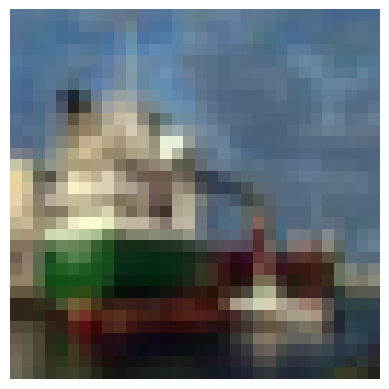

In [ ]:
# Generate a random index within the range of the available batches
rnd_sample_idx = np.random.randint(len(test_loader))
print(f'The image shown represents a/an: {classes[test_loader.dataset[rnd_sample_idx][1]]}')

# Retrieve the actual image
image = test_loader.dataset[rnd_sample_idx][0]

# Normalize the pixel values of the image to a range between 0 and 1

# It is helpful for displaying correct images and improve performance
image = (image - image.min()) / (image.max() -image.min() )

# Plot the image
plot_figure(image)

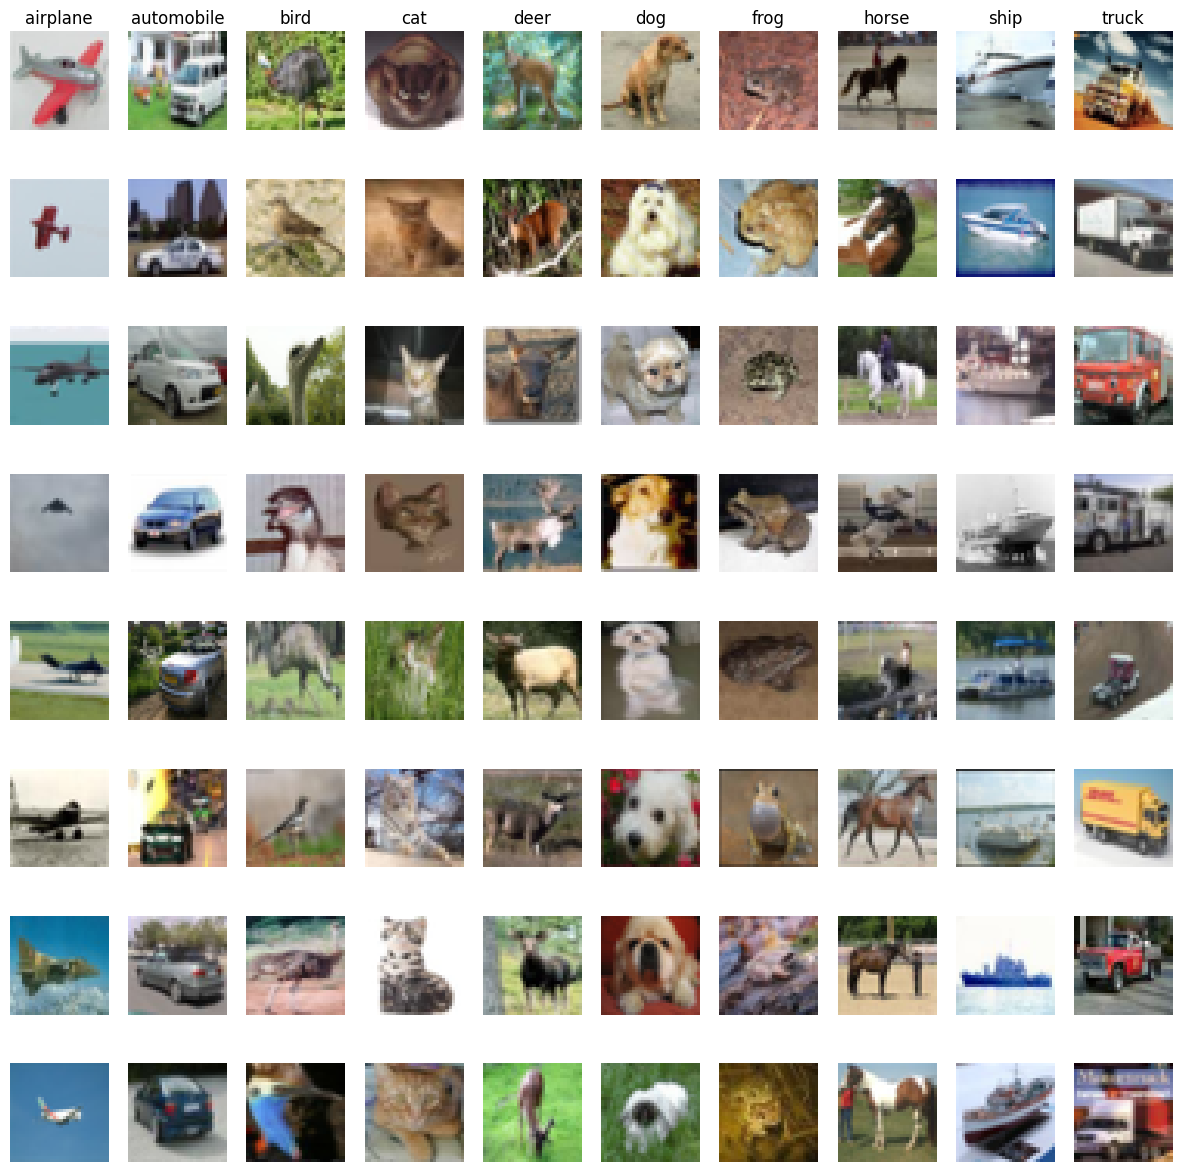

In [ ]:
# Get 8 random images and show them in columns
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))

    # Iterate through each class in the dataset
    for label, sample in enumerate(classes):
        # Find the indices of all images that belong to the current label
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        # Select a random subset of images
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        # Create and display a grid of images
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calculate accuracy

**Accuracy** is a metric that measures the proportion of correctly classified instances out of the total number of instances.

Tn this context, represents the proportion of correctly classified images out of the total number of images evaluated.

In [ ]:
def accuracy(model, loader):
    num_correct = 0
    num_total = 0
    # Set the model to evaluation mode
    model.eval()
    # Move the model to the specified device
    model = model.to(device=device)
    # Disable gradient calculation during the evaluation process
    with torch.no_grad():
      # xi : input data (images)
      # yi : labels or targets
        for xi, yi in loader:
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)
            # The model makes predictions
            scores = model(xi)
            # Extract the predicted labels from the scores
            _, pred = scores.max(dim=1)
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)
        return float(num_correct)/num_total

### Training loop

Define the training process for the model.

The `train` function processes batches of the data, calculate the loss, update model's parameters to minimize the loss, and tracks the performance on a validation test.

In [ ]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)
            # Calculate the loss or cost function using cross-entropy
            cost = F.cross_entropy(input= scores, target=yi)
            # Reset the gradients to zero before calculate new gradients
            optimiser.zero_grad()
            # Calculate the gradients of the loss function using backpropagation
            cost.backward()
            # Update parameters
            optimiser.step()
        # Calculate the accuracy on the validation dataset
        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch} | Cost Function: {cost.item()} | Accuracy: {acc}')

### Linear model

Below we define and set up a simple neural network model, specifically a fully connected or dense neural network, often called a **Multilayer Perceptron (MLP)**. It's called "fully connected" because every neuron in one layer is connected to every neuron in the next layer.

In [ ]:
hidden1 = 256 # 256 neurons
hidden = 256
lr = 0.001 # lr : controls how much the parameters are adjusted during each training step
epochs = 15 # number of times the dataset will be passed through the model during the training process

# Define the structure of the neural network
model1 = nn.Sequential(nn.Flatten(), # transform the input image into a 1D array
                       nn.Linear(in_features=32*32*3, out_features=512), nn.ReLU(),
                       nn.Linear(in_features=512, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=10))
# Update the model's parameters to minimize the loss function
# Adam algorithm - update the weights of a NN during training
optimiser = torch.optim.Adam(model1.parameters(), lr=lr)

In [ ]:
train(model1, optimiser, epochs)

Epoch: 0 | Cost Function: 1.3249104022979736 | Accuracy: 0.4718
Epoch: 1 | Cost Function: 1.389257550239563 | Accuracy: 0.4978
Epoch: 2 | Cost Function: 1.678126335144043 | Accuracy: 0.5058
Epoch: 3 | Cost Function: 1.6004163026809692 | Accuracy: 0.5352
Epoch: 4 | Cost Function: 1.1487126350402832 | Accuracy: 0.5242
Epoch: 5 | Cost Function: 1.2729544639587402 | Accuracy: 0.5208
Epoch: 6 | Cost Function: 1.204222559928894 | Accuracy: 0.5362
Epoch: 7 | Cost Function: 1.026079773902893 | Accuracy: 0.5164
Epoch: 8 | Cost Function: 0.8493724465370178 | Accuracy: 0.5302
Epoch: 9 | Cost Function: 0.7369701266288757 | Accuracy: 0.5356
Epoch: 10 | Cost Function: 1.371486783027649 | Accuracy: 0.5276
Epoch: 11 | Cost Function: 0.48146599531173706 | Accuracy: 0.5202
Epoch: 12 | Cost Function: 1.0111039876937866 | Accuracy: 0.528
Epoch: 13 | Cost Function: 0.7777411937713623 | Accuracy: 0.5194
Epoch: 14 | Cost Function: 1.3368120193481445 | Accuracy: 0.5254


In [ ]:
print(f"Model's Accuracy: {accuracy(model1, test_loader)}")

Model's Accuracy: 0.518


### Sequential CNN

Below we define a CNN architecture, set hyperparameters for its training, and initialize an optimizer for fine-tune model's weights for better performance on the dataset.

* `nn.Conv2d`: Creates a 2-dimensional convolutional layer (used to extract features from images.)

* `in_channels`: The number of input channels the convolutional layer
will receive (number of color channels - 3 for RGB).

* `out_channels`: Set the number of output channels for the convoluitonal layer (filters applied to the input). Each filter learns to detect different features in the input.

* `kernel_size`: The size of the convolutional kernel or filter. 3 means 3x3 square matrix.

* `padding`: Extra pixels around the borders of the input image before applying the convolution.

In [ ]:
channel1 = 32 # number of output channels for the first convolutional layer
channel2 = 64 # number of output channels for the second convolutional layer
epochs = 15
lr = 0.0001

# Define the CNN model
# nn.Conv2d : 2d convolutional layer
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1,
                                   kernel_size=3, padding=1),
                          nn.ReLU(),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,
                                    kernel_size= 3, padding=1),
                          nn.ReLU(),
                          # Reduces the spatial dimensions of the data
                          nn.MaxPool2d(2, 2),
                          # To a single vector
                          nn.Flatten(),
                          # Fully connected linear layer
                          nn.Linear(in_features=16*16*channel2, out_features=10)
                                   )
# Setting up the optimizer
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [ ]:
train(modelCNN1, optimiser, epochs)

Epoch: 0 | Cost Function: 1.657994270324707 | Accuracy: 0.5252
Epoch: 1 | Cost Function: 1.6723015308380127 | Accuracy: 0.579
Epoch: 2 | Cost Function: 1.1716371774673462 | Accuracy: 0.5926
Epoch: 3 | Cost Function: 1.388554573059082 | Accuracy: 0.6214
Epoch: 4 | Cost Function: 1.164069414138794 | Accuracy: 0.6436
Epoch: 5 | Cost Function: 1.1368952989578247 | Accuracy: 0.647
Epoch: 6 | Cost Function: 0.8415993452072144 | Accuracy: 0.655
Epoch: 7 | Cost Function: 0.8841918110847473 | Accuracy: 0.6636
Epoch: 8 | Cost Function: 1.1764304637908936 | Accuracy: 0.6728
Epoch: 9 | Cost Function: 0.6826962828636169 | Accuracy: 0.6664
Epoch: 10 | Cost Function: 0.8376152515411377 | Accuracy: 0.6802
Epoch: 11 | Cost Function: 0.5088749527931213 | Accuracy: 0.6852
Epoch: 12 | Cost Function: 0.7801604270935059 | Accuracy: 0.683
Epoch: 13 | Cost Function: 0.42680954933166504 | Accuracy: 0.6864
Epoch: 14 | Cost Function: 0.5616902709007263 | Accuracy: 0.6806


In [ ]:
print(f"Model's Accuracy: {accuracy(modelCNN1, test_loader)}")

Model's Accuracy: 0.6726
